In [234]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pickle
import random

In [10]:
## Load the map
#img_name = 
#map = Image.open(img_name)
file_name = "Reduced Size Map.npy"
field_map = np.load(file_name);

[[150 150]
 [150 149]
 [141 140]
 ...
 [196  41]
 [ 30  86]
 [290 163]]


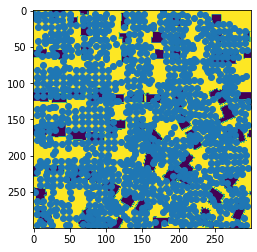

In [11]:
## Load the sensor locations
with open('sensors.pkl', 'rb') as file:
    loc = pickle.load(file) 
    loc = np.array(loc) # sensor locations are stored in loc
print(loc);

implot = plt.imshow(field_map);
plt.scatter(loc[:,0], loc[:, 1]);
plt.rcParams['figure.figsize']=(5-0,50);
plt.show();

In [229]:
def single_route(loc):
    # write a function that designs the route of the big sensor in scenario 1
    return;

def routes(m, loc):
    # write a function that designs the paths for the m sensors to minimize the tota deployment time
    # return the deployment time
    KMean
    return;

def simplify_graph(loc):
    # optional: write a function to simplify the map graph by ignoring some paths
    return;
    
def getDistance( input1, input2, loc = [] ):
    #If len is not passed in, we check if input1 and input2 are tuple points
    if (len(loc) == 0):
        #if no points passed
        if ((not np.shape(input1)) and (not np.shape(input2))):
            return -1;
        else:
            pt1 = input1;
            pt2 = input2;
            return ((pt2[0] - pt1[0])**2 + (pt2[1] - pt1[1])**2)**(0.5);

In [20]:
# plot the number of drones vs total deployment time

M = [1, 3, 5, 8, 10]; #M = number of drones
plt.plot(M,dep_time);
plt.xlabel('Number of Drones Used');
plt.ylabel('Total Deployment Time');
plt.legend(['Node Placement According to our Algorithm', 'Random Node Placement'], \
           bbox_to_anchor =(1, 0.75));
plt.title('Notion 1 of Connectivity');
plt.show();


NameError: name 'dep_time' is not defined

In [37]:
#ploting drone trajectories
#plot sensor locations 
array = [[0]*3]
print(array);

[[0, 0, 0]]


In [225]:
#distances between all points - v2: getDistance(ind1,ind2,loc)
def get_dist(loc):
#loc = array of tupples - includes locations of points to obtain distances for
#returns upper triangular matrix
    N = len(loc) #number of sensors
    dist = np.zeros((N, N));
    for i in range(0, N): #go through all points # note: range goes from 0 to N-1 in this case
        for j in range(0, i):
            distance = getDistance(i, j, loc);
            dist[i,j] = distance;
            dist[j,i] = distance; 
    return(dist);

test = get_dist(loc);
print(test);

[[  0.           1.          13.45362405 ... 118.30891767 136.
  140.60227594]
 [  1.           0.          12.72792206 ... 117.38824473 135.53228398
  140.6982587 ]
 [ 13.45362405  12.72792206   0.         ... 113.25193155 123.43824367
  150.76471736]
 ...
 [118.30891767 117.38824473 113.25193155 ...   0.         171.99127885
  154.01298647]
 [136.         135.53228398 123.43824367 ... 171.99127885   0.
  271.16231302]
 [140.60227594 140.6982587  150.76471736 ... 154.01298647 271.16231302
    0.        ]]


In [155]:
def node_match(v, con_seg, edges):
    # given a vertex, connected segment (list) and edges in graph (array)
    #returns whether that vertex is connected to an edge in the connected segment
    for i in range(0, len(con_seg)): #iterate through each edge in connection
        edge_idx = con_seg[i]; #index to be used in distances matrix (retrieved from connection list)
        for j in range(0, 2): #iterate through 
            if v == edges[edge_idx][j]:
                return True;
    return False;

In [159]:
### testing node_match ###
test_edge = np.zeros([5,2]);
for i in range(0,5):
    test_edge[i,0] = i;
    test_edge[i,1] = i+.1;
print(test_edge);
test_con_seg = [1, 2, 3, 4];
print(test_con_seg);
matching = node_match(4.1, test_con_seg, test_edge);
print(matching);

[[0.  0.1]
 [1.  1.1]
 [2.  2.1]
 [3.  3.1]
 [4.  4.1]]
[1, 2, 3, 4]
True


In [213]:
#order edges in ascending order in terms of weight


dist_scratchwork = dist; #use to set edge distances equal to inf once used so next min can be easily determined
ordered_edges = np.zeros((len(loc), 2)); #each row contains indices of sensors that make up the edge
                                        #rows in ascending order according to distance
for z in range(0,len(loc)):
    min_dist = float('inf');
    min_idx = [-1,-1];
    for i in range(0, N):
        for j in range(0, N):
            if i < j:
                if dist_scratchwork[i,j] < min_dist:
                    min_dist = dist[i,j];
                    min_idx = [i,j];
    ordered_edges[z] = min_idx;
    dist_scratchwork[min_idx[0], min_idx[1]] = float('inf');  
print(ordered_edges);  


[[ 747.  919.]
 [ 764.  807.]
 [ 772. 1052.]
 ...
 [ 910. 1116.]
 [ 972. 1128.]
 [1095. 1257.]]


In [216]:
idx1=ordered_edges[0,0]; 
print(dist[ordered_edges[0,0], ordered_edges[0,1]]);

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [217]:
import numpy as np

class Edge:
    
    def __init__(self, src_index, dst_index, value):
        self.src_index = src_index
        self.dst_index = dst_index
        self.value = value
    
    def hasSameNodes(self, e):
        return (self.src_index == e.src_index and self.dst_index == e.dst_index) or (self.src_index == e.dst_index and self.dst_index == e.src_index)


def getExampleEdgeMatrix(n):
    m = np.zeros((n,n))
    val = 1
    for i in range(n):
        for j in range(i + 1, n):
            m[i, j] = val
            val += 1
    return m

# gets unique (no duplicates) edges sorted by edge weight
def getUniqueSortedEdges(node_indices_a, node_indices_b, edge_matrix, least_to_greatest=True):
    edges = []
    for i in node_indices_a:
        for j in node_indices_b:
            e = None
            if i < j:
                e = Edge(i, j, edge_matrix[i, j])
            elif i > j:
                e = Edge(j, i, edge_matrix[j, i])
            if e is not None:
                duplicate_edge = False
                for other_edge in edges:
                    if e.hasSameNodes(other_edge):
                        duplicate_edge = True
                        break
                if not duplicate_edge:
                    edges.append(e)
    edges.sort(key=lambda e: e.value, reverse=(not least_to_greatest))
    return edges

def getNumpyIndicesFromEdges(edge_objects):
    indices = np.zeros((len(edge_objects), 2))
    for i, e in enumerate(edge_objects):
        indices[i, 0] = e.src_index
        indices[i, 1] = e.dst_index
    return indices

In [223]:
node_indices_a = [];
for i in range(0,len(loc)):
    node_indices_a.append(i);
edge_objects = getUniqueSortedEdges(node_indices_a, node_indices_a, dist, True);
edge_arr = getNumpyIndicesFromEdges(edge_objects);
print(array);

ind1 = array[0,0];
ind2 = array[0,1];
inda = array[len(loc)-1, 0];
indb = array[len(loc)-1, 1];
print(dist[ind1, ind2]);
print(dist[inda, indb]);

KeyboardInterrupt: 

In [221]:
###test of robbies
test =getExampleEdgeMatrix(15);
print(test);
node_indices_a = [2,5];
node_indices_b = [3,7,10];

edge_objects = getUniqueSortedEdges(node_indices_a, node_indices_b, test, True);
array = getNumpyIndicesFromEdges(edge_objects);
print(array);

[[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
   14.]
 [  0.   0.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.
   27.]
 [  0.   0.   0.  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.
   39.]
 [  0.   0.   0.   0.  40.  41.  42.  43.  44.  45.  46.  47.  48.  49.
   50.]
 [  0.   0.   0.   0.   0.  51.  52.  53.  54.  55.  56.  57.  58.  59.
   60.]
 [  0.   0.   0.   0.   0.   0.  61.  62.  63.  64.  65.  66.  67.  68.
   69.]
 [  0.   0.   0.   0.   0.   0.   0.  70.  71.  72.  73.  74.  75.  76.
   77.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  78.  79.  80.  81.  82.  83.
   84.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.  85.  86.  87.  88.  89.
   90.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  91.  92.  93.  94.
   95.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  96.  97.  98.
   99.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 100. 101.
  102.]
 [  0.   0.   0.   0.   0.   0.   0.   0

In [212]:
#set up array to store sensor edges that are connected, and ensure graph is acyclic
#def min_w_span_tree(): ## not put into function form yet

c = [];
c.append(ordered_edges[0]);#min weight edge included by default
print(c);
#np.insert(c,1,[ordered_edges[1]],axis = 0); #note: axis = 0 --> add row-wise

for z in range(0, len(ordered_edges)): #look at each edge in order from min to max weight
    for b in range (0, len(c)): # look at each connected group
        nodeA = ordered_edges[z,0]; #get vertices connected to the edge of interest
        nodeB = ordered_edges[z,1];
        A_in_c_seg = node_match(nodeA,c[b], ordered_edges); #determine if vertices are in this connected segment
        B_in_c_seg = node_match(nodeB,c[b], ordered_edges);
           
        #if one node is a part of a connected piece and the other is not
        if ((A_in_c_seg == True) and (B_in_c_seg == False)):
            #check if the other is connected to another segment
            con_seg = False;
            for k in range (0, len(c)): # look at each connected group
                B_in_c = node_match(nodeB, c[k], ordered_edges);
                if B_in_c == True:
                    #combine segments
                    if k<b: #put b's segment into k and then delete b
                        for f in range(0,c[b]):
                            c[k].append(c[b,f]);
                            c[b,f] = -1;
                    else: #put k's segment into b and then delete k
                        for f in range(0, c[k]):
                            c[b].append(c[k,f]);
                            c[k,f] = -1;
                    con_seg = True;
                    break;
            if con_seg == False: #B isn't in the other segment 
                c[b].append[nodeB]; #append edge index to the connected segment that has a node in common
        if ((A_in_c_seg == False) and (B_in_c_seg == True)):
            #check if the other is connected to another segment
            con_seg = False;
            for k in range (0, len(c)): # look at each connected group
                A_in_c = node_match(nodeA, c[k], ordered_edges);
                if A_in_c == True:
                    #combine segments
                    if k<b: #put b's segment into k and then delete b
                        for f in range(0,c[b]):
                            c[k].append(c[b,f]);
                            c[b,f] = -1;
                        c[k].append(z);
                    else: #put k's segment into b and then delete k
                        for f in range(0, c[k]):
                            c[b].append(c[k,f]);
                            c[k,f] = -1;
                        c[k].append(z);
                    con_seg = True;
                    break;
            if con_seg == False: #A isn't in the other segment 
                c[b].append[nodeA]; #append edge index to the connected segment that has a node in common
        if ((A_in_c_seg == True) and (B_in_c_seg == True)):
            break; #makes a cycle, so we don't want to use this edge 


[array([ 922., 1244.])]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
############# make min weight spanning tree into a funcion
### creating tree from min weight tree --> start from center of map
## copy code from end of kaleb's clustering to create list of nodes in cluster - pass this to min weight spanning tree to 
### make tree with variables from minimum weight spanning tree  - pass to preorder traversal 

In [ ]:
#########################################################################
# min weight spanning tree outline (not function)
###########################################################################

#set up array to store sensor edges that are connected, and ensure graph is acyclic

c = np.empty([1,2]); #min weight edge included by default
print(c);
c[0] = ordered_edges[0];
np.insert(c,1,[ordered_edges[1]],axis = 0); #note: axis = 0 --> add row-wise
print(c);
for z in range(0, len(ordered_edges)): #look at each edge in order from min to max weight
    for b in range (0, len(c)): # look at each connected group
        nodeA = ordered_edges[z,0]; #get vertices connected to the edge of interest
        nodeB = ordered_edges[z,1];
        A_in_c_seg = node_match(nodeA,c[b], ordered_edges); #determine if vertices are in this connected segment
        B_in_c_seg = node_match(nodeB,c[b], ordered_edges);
           
        #if one node is a part of a connected piece and the other is not
        if ((A_in_c_seg == True) and (B_in_c_seg == False)):
            #check if the other is connected to another segment
            con_seg = False;
            for k in range (0, len(c)): # look at each connected group
                B_in_c = node_match(nodeB, c[k], ordered_edges);
                if B_in_c == True:
                    #combine segments
                    if k<b: #put b's segment into k and then delete b
                        for f in range(0,c[b]):
                            c[k].append(c[b,f]);
                            c[b,f] = -1;
                    else: #put k's segment into b and then delete k
                        for f in range(0, c[k]):
                            c[b].append(c[k,f]);
                            c[k,f] = -1;
                    con_seg = True;
                    break;
            if con_seg == False: #B isn't in the other segment 
                c[b].append[z]; #append edge index to the connected segment that has a node in common
        if ((A_in_c_seg == False) and (B_in_c_seg == True)):
            #check if the other is connected to another segment
            con_seg = False;
            for k in range (0, len(c)): # look at each connected group
                A_in_c = node_match(nodeA, c[k], ordered_edges);
                if A_in_c == True:
                    #combine segments
                    if k<b: #put b's segment into k and then delete b
                        for f in range(0,c[b]):
                            c[k].append(c[b,f]);
                            c[b,f] = -1;
                        c[k].append(z);
                    else: #put k's segment into b and then delete k
                        for f in range(0, c[k]):
                            c[b].append(c[k,f]);
                            c[k,f] = -1;
                        c[k].append(z);
                    con_seg = True;
                    break;
            if con_seg == False: #A isn't in the other segment 
                c[b].append[z]; #append edge index to the connected segment that has a node in common
        if ((A_in_c_seg == True) and (B_in_c_seg == True)):
            break; #makes a cycle, so we don't want to use this edge 

In [ ]:
########## garbage from kruscals #######

#determine root node:
nodeA = min_idx[0];
nodeB = min_idx[1];
min_distA = float('inf');
min_distB = float('inf');
min_idxA = -1;
min_idxB = -1;

for j in range(0, N):
    if j > nodeA and j != nodeB: #traverse up. tri. matrix horizontally
        if dist[nodeA, j] < min_distA:
            min_distA = dist[nodeA, j];
            min_idxA = j;  
    if j < nodeA and j != nodeB: #traverse up. tri. matrix vertically
        if dist[j, nodeA] < min_distA:
            min_distA = dist[j, nodeA];
            min_idxA = j;
for j in range(0, N):
    if j > nodeB and j != nodeA:
        if dist[nodeB, j] < min_distB:
            min_distB = dist[nodeB, j];
            min_idxB = j;
    if j < nodeB and j != nodeA: #traverse up.tri. matrix vertically
        if dist[j, nodeB] < min_distB:
            min_distB = dist[j, nodeB];
            min_idxB = j;

if min_distB < min_distA:
    c.append(nxt_idxB);
    print('B');
else:
    c.append(min_idxA);
    print('A');

In [ ]:
#distances between all points - v1: getDistance(pt1,pt2) ##################don't use?
N = len(loc) #number of sensors
dist = np.zeros((N, N));
for i in range(0, N): #go through all points # note: range goes from 0 to N-1 in this case
    for j in range(0, N):
        if i == j:
            dist[i,j] = float('inf'); #will need to find minimum values in array, so use infinity instead of 0 as placeholder
        else:
            distance = getDistance(loc[i], loc[j]);
            dist[i,j] = distance;
print(dist);


In [77]:
#distances between all points - v2: getDistance(ind1,ind2,loc) ############don't use - contains duplicate data
N = len(loc) #number of sensors
dist = np.zeros((N, N));
for i in range(0, N): #go through all points # note: range goes from 0 to N-1 in this case
    for j in range(0, N):
        if i == j:
            dist[i,j] = float('inf'); #will need to find minimum values in array, so use infinity instead of 0 as placeholder
        else:
            distance = getDistance(i, j, loc);
            dist[i,j] = distance;
print(dist);


[[         inf   1.          13.45362405 ... 118.30891767 136.
  140.60227594]
 [  1.                  inf  12.72792206 ... 117.38824473 135.53228398
  140.6982587 ]
 [ 13.45362405  12.72792206          inf ... 113.25193155 123.43824367
  150.76471736]
 ...
 [118.30891767 117.38824473 113.25193155 ...          inf 171.99127885
  154.01298647]
 [136.         135.53228398 123.43824367 ... 171.99127885          inf
  271.16231302]
 [140.60227594 140.6982587  150.76471736 ... 154.01298647 271.16231302
           inf]]


In [72]:
############################# won't be used #############################
#implement kruscal's algorithm to create minimum weight spanning tree
#cost associated with each edge (i.e. path) = distance between sensors

#set up array to store sensor indices when connected to ensure graph = acyclic
c = [];

#find edge of smallest cost
from numpy import unravel_index
min_idx = dist.argmin(); #find 1D index of minimum distance
rt_edge_nodes = unravel_index(min_idx, dist.shape) #get the indices of the 2 nodes connected to the minimum weight edge 
print(rt_edge_nodes);

#determine which sensor is the root - call nodeA & nodeB
for i in range (0,2);
nodeA = rt_edge_nodes[0];
nodeB = rt_edge_node[1];
c.append(nodeA);
c.append(nodeB);
min_W_nodeA #minimum weight edge coming off of node A (not counting that connecting to node B)
dist_scratchwork = dist;
dist_scratchwork[nodeA,nodeB] = float('inf'); #remove that edge from consideration when finding next minimum edge or 
dist_scratchwork[nodeB,nodeA] = float('inf');


min_indxA = dist_scratchwork[nodeA].argmin();

min_indxB = dist_scratchwork[nodeB].argmin();

sensA_min = 
sensB_min 
#loop through:
    #check the edges connected to either node
        #whichever has edge of min cost - 
    #check whether the edge creates a cycle: - keep track of connected components create array c that contains the nodes
    #that are connected (list them in order) - then i check that array and if my next edge goes to one of those vertices
    #then I know it will be cyclic
        #create label for edges between points? -

#add edges (with smaller remaining cost) provided they do not create cycles

#search through dist funciton for min value
#take index and look through distances of edges connected to that point

(0, 1)
140.60227594174995


In [199]:
class Edge:
    def __init__(self,row,col,val):
        self.row = row;
        self.col = col;
        self.val = val;
        
    def __lt__(self, e):
        return self.val < e.val;
    def __gt__(self, e):
        return self.val > e.val;
    def __le__(self, e):
        return self.val <= e.val;
    def __ge__(self, e):
        return self.val >= e.val;
    def __eq__(self,e):
        return self.val == e.val;

In [200]:
######idea from Robbie - bad version##########don't use
def order_edges(idx_vertices, dist):
    #pass a list of vertices and upper triangular 2D array of distances between nodes
    #returns an 2D array with edges between the vertices ordered
    temp_idx_vertices = idx_vertices;
    N = len(idx_vertices);
    edges = np.zeros((N, 2));
    min_dist = float('inf');
    min_dist_nodes = [-1, -1];
    edge_objects = [];
    for a in idx_vertices:
        for b in idx_vertices:
            if idx_vertices[a] < idx_vertices[b]:
                edge_objects.append(Edge(a,b,dist[a,b]));
            else:
                edge_dist = dist[idx_vert2,idx_vert1];
    return edge_objects.sort();

test = order_edges([5,3,7,4], dist);
print(test[1].val)
print(test[2].val)
print(test[3].val)

IndexError: list index out of range

In [214]:
#########broken - use robbies instead
def order_edges(idx_vertices, dist):   ###broken
    #pass a list of vertices and upper triangular 2D array of distances between nodes
    #returns an 2D array with edges between the vertices ordered
    temp_idx_vertices = idx_vertices;
    N = len(idx_vertices);
    edges = np.zeros((N, 2));
    min_dist = float('inf');
    min_dist_nodes = [-1, -1];

    for z in range(0, N):
        for i in range(0,N):
            for j in range(0,N):
                if i != j:
                    idx_vert1 = temp_idx_vertices[i]; #get indices of vertices that make edge
                    idx_vert2 = temp_idx_vertices[j];
                    print(idx_vert1);
                    print(idx_vert2);
                    
                    if idx_vert1<idx_vert2:
                        edge_dist = dist[idx_vert1,idx_vert2];#get distance of edge
                        print("1<2");
                        print(edge_dist);
                    else:
                        edge_dist = dist[idx_vert2,idx_vert1];
                        print("2<1")
                    if edge_dist<min_dist:
                            min_dist = edge_dist;
                            min_dist_nodes = [idx_vert1,idx_vert2];
                            temp_idx_vertices[i] = [float('inf'), float('inf')];
        edges[z] = min_dist_nodes;
    return edges;

idx_vertices = [1,2,3,4]
edges = order_edges(idx_vertices, dist);
print(edges);

1
2
1<2
inf
1
3
1<2
inf
1
4
1<2
20.12461179749811
2
[inf, inf]


TypeError: '<' not supported between instances of 'int' and 'list'

In [231]:
#Function to find root of next spanning tree (of new cluster)
def rt_next_cluster(x, y, locations):
    #Inputs: x,y = location of a single point where the drone is
            #sensors = and a list of m points that are in the new cluster
    min_dist_found = float('inf');
    min_dist_pt = -1; 
    current_loc = [x,y]
    for i in range(0, len(locations)):
        dest_x_val = locations[i][0];
        dest_y_val = locations[i][1];
        if (dest_x_val != x) or (dest_y_val !=y): #check you aren't attempting to move to same point
            dest_loc = [dest_x_val, dest_y_val];
            dist_considered = getDistance(current_loc, dest_loc)
            if dist_considered < min_dist_found:
                min_dist_found = dist_considered;
                min_dist_pt = i; #index of the point in locations that is closed to our current location
    return min_dist_pt;

################### test: ###########################
#Within function, calculate array of m distances from drone point to each of m points, then return point with min distance
#Output: the index of the point with the min distance from the drone’s current location
x = 3;
y = 5;
test = [[1,1],[1,3],[6,8],[9,3],[3,5],[4,6]];
nxt_clust = rt_next_cluster(x,y,test);
print(nxt_clust); #should be index 5

5


In [232]:
## Helper Functions
#Inputs are two tuples, returns the distance between the two points
#If loc is inputted, first two inputs are taken to be indices in loc
def getDistance( input1, input2, loc = [] ):
    #If len is not passed in, we check if input1 and input2 are tuple points
    if (len(loc) == 0):
        #if no points passed
        if ((not np.shape(input1)) and (not np.shape(input2))):
            return -1;
        else:
            pt1 = input1;
            pt2 = input2;
            return ((pt2[0] - pt1[0])**2 + (pt2[1] - pt1[1])**2)**(0.5);
            
    #Otherwise assume input1 and input2 are indices in loc
    else:
        ind1 = input1;
        ind2 = input2;
        if (ind1 >= 0 and ind2 >= 0 and ind1 < len(loc) and ind2 < len(loc) and ind1 != ind2):
            pt1 = loc[ind1,:];
            pt2 = loc[ind2,:];
            return ((pt2[0] - pt1[0])**2 + (pt2[1] - pt1[1])**2)**(0.5);
        else:
            return -1;

#Function to add node to tree based for one parent
#If input2 is a node, then we add it right away. Otherwise we need to
#create the node first and then add it
#Parent is the index in tree of the parent node
#input 2 can either be a (1) node dictionary (don't use 3rd or 4th parameter)
#, (2) an integer representing an index in loc for the sensor location, or
#(3) a tuple representing the 2d location of the new node
def addNode(tree, input2, parent = -1, loc = []):
    #Check if second input is the node to add (dictionary type)
    if isinstance(input2, dict):
        node = input2;
    else:
        n_loc = input2;
        if (parent >= 0 and parent < len(tree)):
            dist_parent = getDistance(tree[parent]["loc"], n_loc, loc);
        else:
            dist_parent = -1;
            parent = -1;
        node = {"parent": parent, "children": [], "loc": n_loc, \
                    "dist_parent": dist_parent};
    tree.append(node)
    #Update children
    if (node["parent"] >= 0 and node["parent"] < len(tree) - 1):
        tree[tree[len(tree) - 1]["parent"]]["children"].append(len(tree) - 1);
    return tree;

#Pass through the indices of the spots that this drone travels, and the sensor locations
#returns total distance travelled by drone
def totalDistance(dronePath, loc = []):
    dist = 0;
    num_pts = len(dronePath);
    #If loc is not given, assume that the dronePath variable is a matrix
    #containing the sequence of all path points
    if (len(loc) == 0):
        for i in range(num_pts - 1):
            dist = dist + getDistance(dronePath[i], dronePath[i + 1]);
    else:
        for i in range(num_pts - 1):
            dist = dist + getDistance(dronePath[i], dronePath[i + 1], loc);
    return dist;

#Input is the min weight spanning tree, output is the preorder traversal list
#If no root location is given in the tree array, assume first node is root
def preorderTraversal(tree, root_index = 0):
    if (len(tree) == 0):
        return [];
    children = tree[root_index]["children"];
    num_children = len(children);
    traversal_cut = [tree[root_index]["loc"]];
    if num_children == 0:
        return traversal_cut;
    for i in range(num_children):
        traversal_cut = traversal_cut + preorderTraversal(tree, children[i]);
    return traversal_cut;

## Clustering
#Helper function to calculate objective function based on
#indicator variables r_nk and centers mu_ids
def getJ(r_nk, mu, loc):
    (N, K) = np.shape(r_nk);
    J = 0;
    for n in range(N):
        for k in range(K):
            J = J + (r_nk[n][k])*((getDistance(loc[n], mu[k]))**2);
    return J;
        
#K means Algorithm. Returns a tuple whose 
#first element is the centroids (mu), and
#second element is the centroid assignment matrix, size (len(loc) x K)
def KMeansClusters(K, loc):
    #Initialize centers using K++ means
    N = len(loc);
    mu = np.zeros((K, 2));
    mu[0,:] = loc[random.randint(0, N)];
    for i in range(1, K):
        #For each point, find how close it is to the closes centers
        distances = [float('inf')]*N;
        for j in range(N):
            #loop over existing centers
            for w in range(i):
                this_distance = getDistance(loc[j], mu[w]);
                if (this_distance < distances[j]):
                    distances[j] = this_distance;
        pt_to_add = np.argmax(distances);
        mu[i,:] = loc[pt_to_add];
    r_nk = -1;
    J = 0;
    J_next = -1;
    while (J_next != J):
        #Update J
        J = J_next;
        #Assign points to centers
        r_nk = np.zeros((N, K));
        for n in range(N):
            dist_to_mus = [0]*K;
            for k in range(K):
                dist_to_mus[k] = ((getDistance(loc[n], mu[k]))**2);
            mu_to_assign = np.argmin(dist_to_mus);
            r_nk[n][mu_to_assign] = 1;
        #Recalculate centers
        num_mu_groups = np.sum(r_nk, 0);
        for k in range(K):
            #Get points in center k
            i_n = 0;
            points_k = np.zeros((int(num_mu_groups[k]), 2));
            for n in range(N):
                if (r_nk[n][k] == 1):
                    points_k[i_n,:] = loc[n];
                    i_n = i_n + 1;
            #Average of points assigned to center k gives its new center
            if (i_n != num_mu_groups[k]):
                return -1;
            mu[k,:] = np.average(points_k, 0);
        #Recalculate new J
        J_next = getJ(r_nk, mu, loc);
    
    return (mu, r_nk);
    

In [237]:
def routes(m, loc):
    # write a function that designs the paths for the m drones to minimize the tota deployment time
    # return the deployment time
    
    #Create m clusters for m drones
    (mu, clust) = KMeansClusters(m, loc);
    
    #Assign drones to clusters - each cluster label = that drone index
    drones = [];
    for i in range(0,m): # iterate through each column of the cluster matrix
        drones.append(i);
    #find distance traveled by each drone
        #use getDistance to determine center of map to cluster, distances between points in clusters & travel time back to center
    #compare total distances for each drone
        #drone with shortest distance then goes to cluster that requires longest distance 
    #Have drones traverse through their clusters using min weight spanning tree method- essentially the same thing but happening M times on smaller scales

routes(3, loc); 

[0]
[0, 1]
[0, 1, 2]
